In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
#import sc_toolbox

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [3]:
import anndata

In [6]:
%%R
library(edgeR)
#library(MAST)

In [7]:
import os

In [17]:
adata = sc.read('lung_tumor.h5ad')

In [18]:
adata.obs['label'] = adata.obs['level2_cell_type']

In [19]:
adata.obs['replicate'] = adata.obs['dataset']
#adata.obs['replicate'] = [f'{x}_{y}' for x,y in zip(adata.obs['dataset'],adata.obs['source'])]

In [20]:
np.max(adata.X)

27351.0

In [22]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")


In [24]:
adata.obs["sample"] = [
    f"{rep}_{l}" for rep, l in zip(adata.obs["replicate"], adata.obs["label"])
]

In [25]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")
adata.obs["label"] = adata.obs["label"].astype("category")
adata.obs["sample"] = adata.obs["sample"].astype("category")
#adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

In [26]:
adata.obsm['X_pca'] = adata.obsm['X_scVI'].copy()

In [27]:
anndata2ri.activate()

In [28]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
#%%R
#devtools::install_github("MarioniLab/miloR")

In [30]:
%%R
library(CellChat)
#library(Seurat)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [31]:
del adata.obsp
del adata.uns
adata.obsm.pop('X_scANVI')
adata.obsm.pop('X_scVI')
adata.obsm.pop('protein_expression')

CD3  CD19-1  CD4-1  CD8  \
AAACCTGAGGATGGTC-1-0_leader_cite_48_leader         398.0     7.0   88.0  7.0   
AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader          17.0     0.0   10.0  1.0   
AAACCTGCACTCTGTC-1-0_leader_cite_48_leader          63.0     1.0    1.0  0.0   
AAACCTGTCCAAATGC-1-0_leader_cite_48_leader          58.0     3.0    0.0  2.0   
AAACCTGTCGAGCCCA-1-0_leader_cite_48_leader          49.0    22.0    1.0  2.0   
...                                                  ...     ...    ...  ...   
TTTGTCAGTACCGGCT-1-SRR11821884_chen_SRR11821884_4    0.0     0.0    0.0  0.0   
TTTGTCAGTCGAACAG-1-SRR11821884_chen_SRR11821884_4    0.0     0.0    0.0  0.0   
TTTGTCAGTGTGGCTC-1-SRR11821884_chen_SRR11821884_4    0.0     0.0    0.0  0.0   
TTTGTCATCTCTGAGA-1-SRR11821884_chen_SRR11821884_4    0.0     0.0    0.0  0.0   
TTTGTCATCTGTCTAT-1-SRR11821884_chen_SRR11821884_4    0.0     0.0    0.0  0.0   

                                                   CD16  CD14-1  CD123  \
AAACCTGAGGATGGTC-1-0_leader_cite_48_leader          6.0    50.0    0.0   
AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader          1.0   117.0  139.0   
AAACCTGCACTCTGTC-1-0_leader_cite_48_leader          1.0    15.0   28.0   
AAACCTGTCCAAATGC-1-0_leader_cite_48_leader          4.0    25.0    1.0   
AAACCTGTCGAGCCCA-1-0_leader_cite_48_leader          1.0    16.0    4.0   
...                                                 ...     ...    ...   
TTTGTCAGTACCGGCT-1-SRR11821884_chen_SRR11821884_4   0.0     0.0    0.0   
TTTGTCAGTCGAACAG-1-SRR11821884_chen_SRR11821884_4   0.0     0.0    0.0   
TTTGTCAGTGTGGCTC-1-SRR11821884_chen_SRR11821884_4   0.0     0.0    0.0   
TTTGTCATCTCTGAGA-1-SRR11821884_chen_SRR11821884_4   0.0     0.0    0.0   
TTTGTCATCTGTCTAT-1-SRR11821884_chen_SRR11821884_4   0.0     0.0    0.0   

                                                   HLA-DR  CD66b  CD56  ...  \
AAACCTGAGGATGGTC-1-0_leader_cite_48_leader          219.0    2.0   8.0  ...   
AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader          642.0    0.0   1.0  ...   
AAACCTGCACTCTGTC-1-0_leader_cite_48_leader          165.0    3.0   1.0  ...   
AAACCTGTCCAAATGC-1-0_leader_cite_48_leader           32.0    0.0   1.0  ...   
AAACCTGTCGAGCCCA-1-0_leader_cite_48_leader          170.0    3.0   4.0  ...   
...                                                   ...    ...   ...  ...   
TTTGTCAGTACCGGCT-1-SRR11821884_chen_SRR11821884_4     0.0    0.0   0.0  ...   
TTTGTCAGTCGAACAG-1-SRR11821884_chen_SRR11821884_4     0.0    0.0   0.0  ...   
TTTGTCAGTGTGGCTC-1-SRR11821884_chen_SRR11821884_4     0.0    0.0   0.0  ...   
TTTGTCATCTCTGAGA-1-SRR11821884_chen_SRR11821884_4     0.0    0.0   0.0  ...   
TTTGTCATCTGTCTAT-1-SRR11821884_chen_SRR11821884_4     0.0    0.0   0.0  ...   

                                                   EPCAM-1  CD39  CD44-1  \
AAACCTGAGGATGGTC-1-0_leader_cite_48_leader             0.0   0.0     0.0   
AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader             0.0   0.0     0.0   
AAACCTGCACTCTGTC-1-0_leader_cite_48_leader             0.0   0.0     0.0   
AAACCTGTCCAAATGC-1-0_leader_cite_48_leader             0.0   0.0     0.0   
AAACCTGTCGAGCCCA-1-0_leader_cite_48_leader             0.0   0.0     0.0   
...                                                    ...   ...     ...   
TTTGTCAGTACCGGCT-1-SRR11821884_chen_SRR11821884_4      0.0   0.0     0.0   
TTTGTCAGTCGAACAG-1-SRR11821884_chen_SRR11821884_4      0.0   0.0     0.0   
TTTGTCAGTGTGGCTC-1-SRR11821884_chen_SRR11821884_4      0.0   0.0     0.0   
TTTGTCATCTCTGAGA-1-SRR11821884_chen_SRR11821884_4      0.0   0.0     0.0   
TTTGTCATCTGTCTAT-1-SRR11821884_chen_SRR11821884_4      0.0   0.0     0.0   

                                                   CD54  CD9-1  THY1-1  \
AAACCTGAGGATGGTC-1-0_leader_cite_48_leader          0.0    0.0     0.0   
AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader          0.0    0.0     0.0   
AAACCTGCACTCTGTC-1-0_leader_cite_48_leader          0.0    0.0     0.0   
AAACCTGTCCAAATGC-1-0_leader_cite_48_leader   

In [32]:
adata_nk = sc.read('all_nk_cells.h5ad')

In [34]:
cellstate_celltype_dict = {'B cells' : 'B cells', 'CD56bright NK cells' : 'NK cells', 'CD56dim NK cells' : 'NK cells', 'Dendritic cells' : 'Myeloid',
       'Endothelial cells' : 'Endothelial cells', 'Epithelial Stroma' : 'Epithelial Stroma', 'Fibroblasts' : 'Fibroblasts', 'ILCs' : 'ILCs', 'Late erythroid' : 'Late erythroid',
       'MAIT cells' : 'T cells', 'Macrophages' : 'Myeloid', 'Mast cells' : 'Myeloid', 'NKT cells' : 'NKT cells', 'Plasma cells' : 'B cells',
       'Melanoma cells' : 'Melanoma cells', 'Memory B cells' : 'B cells', 'Monocytes' : 'Myeloid', 'Regulatory T cells' : 'T cells',
       'Tcm/Naive helper T cells' : 'T cells', 'Tem/Effector helper T cells' : 'T cells',
       'Tem/Trm cytotoxic T cells' : 'T cells', 'Type 1 helper T cells' : 'T cells'}

In [35]:
adata.obs['label'] = ['NK cells' if x in ['CD56bright NK cells', 'CD56dim NK cells'] else x for x in adata.obs['label']]

In [37]:
adata_nk.obs.index = [f'{x}_{y}' for x,y in zip(adata_nk.obs.index, adata_nk.obs['sample'])]

In [38]:
adata.obs['label'] = [x if x != 'NK cells' else x if not y in adata_nk[adata_nk.obs['tumor_type'] == 'lung'].obs.index else adata_nk[adata_nk.obs['tumor_type'] == 'lung'][y].obs['nhood_group'][0] for x,y in zip(adata.obs['label'], adata.obs.index)]

In [44]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [45]:
sc.pp.log1p(adata)

In [46]:
#adata.layers['logcounts'] = adata.X

In [47]:
#adata

In [48]:
%%R -i adata
adata

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/anndata2ri/py2r.py:37: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


class: SingleCellExperiment 
dim: 12675 737769 
metadata(3): label_colors level2_cell_type_colors log1p
assays(1): X
rownames(12675): LINC00115 FAM41C ... MT-ND6 MT-CYB
rowData names(6): mt ribo ... pct_dropout_by_counts total_counts
colnames(737769): AAACCTGAGGATGGTC-1-0_leader_cite_48_leader
  AAACCTGAGTTCGCGC-1-0_leader_cite_48_leader ...
  TTTGTCATCTCTGAGA-1-SRR11821884_chen_SRR11821884_4
  TTTGTCATCTGTCTAT-1-SRR11821884_chen_SRR11821884_4
colData names(29): tissue batch ... label replicate
reducedDimNames(2): UMAP PCA
mainExpName: NULL
altExpNames(0):


In [49]:
%%R
assayNames(adata) <- c('logcounts')

In [50]:
%%R
assayNames(adata)

[1] "logcounts"


In [51]:
%%R
cellchat <- createCellChat(adata, group.by='label')

[1] "Create a CellChat object from a SingleCellExperiment object"
The `logcounts` assay is used 
The `colData` assay in the SingleCellExperiment object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  1 2 3 4 5 6 B cells Dendritic cells Endothelial cells Epithelial Stroma Fibroblasts ILCs Late erythroid Macrophages Mast cells Memory B cells NKT cells Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells 


In [52]:
%%R
saveRDS(cellchat, file = "/tumor-data/cellchat_lung_nk_groups.rds")

In [53]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 12675 genes.
 737769 cells. 
CellChat analysis of single cell RNA-seq data! 


In [54]:
%%R
CellChatDB <- CellChatDB.human

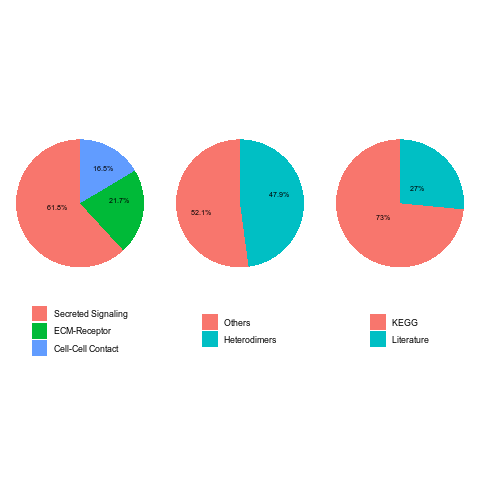

In [55]:
%%R
showDatabaseCategory(CellChatDB)

In [56]:
%%R
CellChatDB.use <- CellChatDB

In [57]:
%%R
cellchat@DB <- CellChatDB.use

In [58]:
%%R
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
#cellchat <- projectData(cellchat, PPI.human)

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~05m 45s       |++                                                | 3 % ~04m 12s       |+++                                               | 4 % ~03m 40s       |+++                                               | 6 % ~03m 19s       |++++                                              | 7 % ~03m 05s       |+++++                                             | 9 % ~02m 56s       |+++++                                             | 10% ~02m 46s       |++++++                                            | 11% ~02m 40s       |+++++++                                           | 13% ~02m 34s       |++++++++                                          | 14% ~02m 28s       |++++++++                                          | 16% ~02m 25s       |+++++++++                                         | 17% ~02m 21s       |++++++++++                                        | 19% ~02m 

In [59]:
%%R
saveRDS(cellchat, file = "/tumor-data/cellchat_lung_nk_groups.rds")

In [60]:
%%R
cellchat <- computeCommunProb(cellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-09-13 11:10:01]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-09-13 12:33:00]"


In [61]:
%%R
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [62]:
%%R
cellchat <- computeCommunProbPathway(cellchat)

In [63]:
%%R
cellchat <- aggregateNet(cellchat)

In [68]:
%%R
saveRDS(cellchat, file = "/tumor-data/cellchat_lung_nk_groups.rds")

In [67]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 12675 genes.
 737769 cells. 
CellChat analysis of single cell RNA-seq data! 


In [ ]:
%%R
cellchat

In [65]:
#%%R
#cellchat <- readRDS(file = "/tumor-data/cellchat_lung_nk_groups.rds")

In [43]:
'B cells CD56bright NK cells CD56dim NK cells Dendritic cells Endothelial cells Epithelial Stroma Fibroblasts ILCs Late erythroid Macrophages Mast cells Memory B cells NKT cells Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells '

'B cells CD56bright NK cells CD56dim NK cells Dendritic cells Endothelial cells Epithelial Stroma Fibroblasts ILCs Late erythroid Macrophages Mast cells Memory B cells NKT cells Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells '

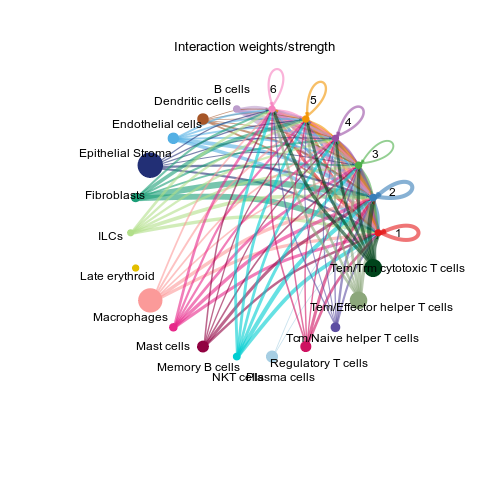

In [80]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#svglite(file ="number_of_interactions_all.svg")
#netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, targets.use=c(1,2,3,4,5,6), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
#dev.off()

In [187]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
svglite(file ="interaction_weights_all.svg")
#netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
dev.off()

png 
  2 


In [181]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
svglite(file ="number_of_interactions_cd56bright_cd56dim_as_targets.svg")
netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#netVisual_circle(cellchat@net$weight, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
dev.off()

png 
  2 


In [182]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
svglite(file ="interaction_weights_cd56bright_cd56dim_as_targets.svg")
netVisual_circle(cellchat@net$weight, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
dev.off()
#ggsave('interaction_weights_cd56bright_cd56dim_as_targets.pdf')

png 
  2 


In [183]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
svglite(file ="number_of_interactions_cd56bright_cd56dim_as_sources.svg")
netVisual_circle(cellchat@net$count, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#netVisual_circle(cellchat@net$weight, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
dev.off()
#ggsave('number_of_interactions_cd56bright_cd56dim_as_sources.pdf')

png 
  2 


In [184]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
svglite(file ="interaction_weights_cd56bright_cd56dim_as_sources.svg")
netVisual_circle(cellchat@net$weight, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
dev.off()
#ggsave('interaction_weights_cd56bright_cd56dim_as_sources.pdf')

png 
  2 


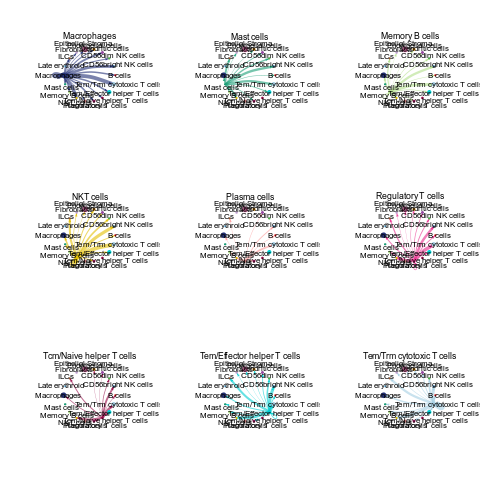

In [57]:
%%R
mat <- cellchat@net$weight
par(mfrow = c(3,3), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

### CXCL

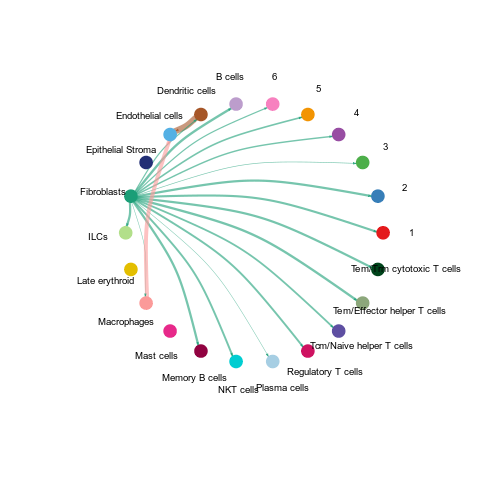

In [81]:
%%R
pathways.show <- c("CXCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="CXCL_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#dev.off()
#ggsave('CXCL_pathway_netvisual_aggregate_circle.pdf')

png 
  2 


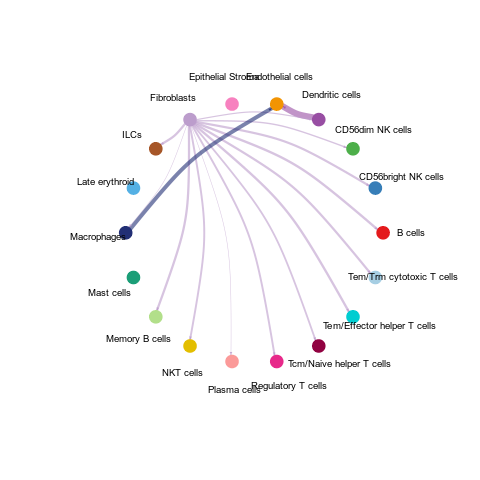

In [153]:
%%R
pathways.show <- c("CXCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="CXCL_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#dev.off()
#ggsave('CXCL_pathway_netvisual_aggregate_circle.pdf')

In [154]:
%%R
# Chord diagram
par(mfrow=c(1,1))
svglite(file ="CXCL_pathway_netvisual_aggregate_chord.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
dev.off()

png 
  2 


In [155]:
%%R
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
#> Do heatmap based on a single object
ggsave('CXCL_pathway_netvisual_heatmap.pdf')

Saving 6.67 x 6.67 in image


In [156]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)
ggsave('CXCL_pathway_contribution.pdf')

Saving 6.67 x 6.67 in image


png 
  2 


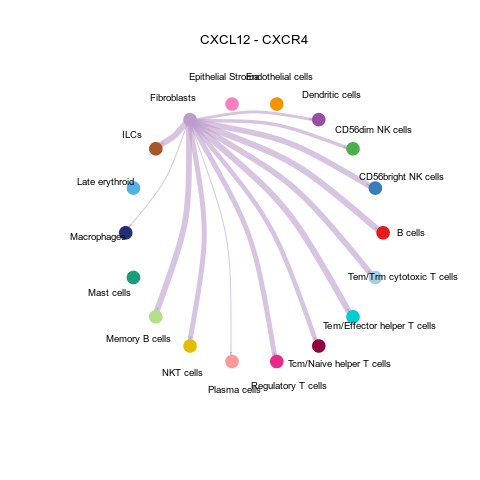

In [157]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[4,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
svglite(file ="CXCL12_CXCR4.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#ggsave('CXCL12_CXCR4.pdf')
dev.off()

In [158]:
%%R
svglite(file ="CXCL12_CXCR4_chord.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
dev.off()

png 
  2 


In [159]:
%%R
netVisual_bubble(cellchat, targets.use = c(2,3), signaling = c("CXCL"), remove.isolate = FALSE)
ggsave('cxcl12_cxcr4_nk_cells_bubble.pdf')

Saving 6.67 x 6.67 in image


In [160]:
%%R
plotGeneExpression(cellchat, signaling = "CXCL")
ggsave('CXCL_gene_expression.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [161]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="CXCL_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
#ggsave('CXCL_sig_pathway_role_network.pdf')
dev.off()

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~01s           |+++                                               | 5 % ~03s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~02s           |++++++                                            | 11% ~03s           |+++++++                                           | 14% ~02s           |++++++++                                          | 16% ~02s           |++++++++++                                        | 18% ~02s           |+++++++++++                                       | 20% ~02s           |++++++++++++                                      | 23% ~02s           |+++++++++++++                                     | 25% ~02s           |++++++++++++++                                    | 27% ~01s           |+++++++++++++++                                   | 30% ~01s 

### CCL

png 
  2 


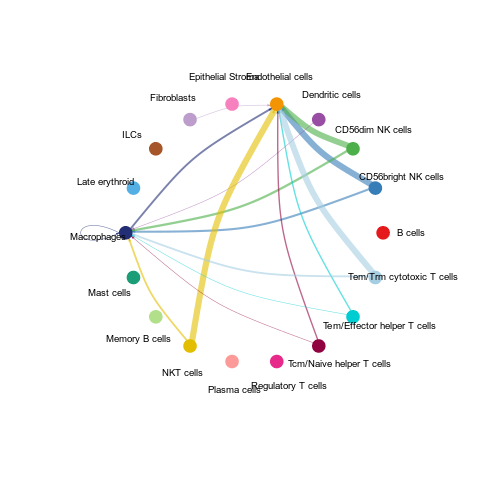

In [191]:
%%R
pathways.show <- c("CCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
par(mfrow=c(1,1))
svglite(file ="CCL_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
dev.off()
#ggsave('CCL_pathway_netvisual_aggregate_circle.pdf')

In [192]:
%%R
# Chord diagram
par(mfrow=c(1,1))
svglite(file ="CCL_pathway_netvisual_aggregate_chord.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
dev.off()
#ggsave('CCL_pathway_netvisual_aggregate_chord.pdf')

png 
  2 


In [164]:
%%R
# Heatmap
par(mfrow=c(1,1))
svglite(file ="CCL_pathway_netvisual_heatmap.svg")
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
dev.off()

#> Do heatmap based on a single object
#ggsave('CCL_pathway_netvisual_heatmap.pdf')

png 
  2 


In [165]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)
ggsave('CCL_pathway_contribution.pdf')

Saving 6.67 x 6.67 in image


[[1]]



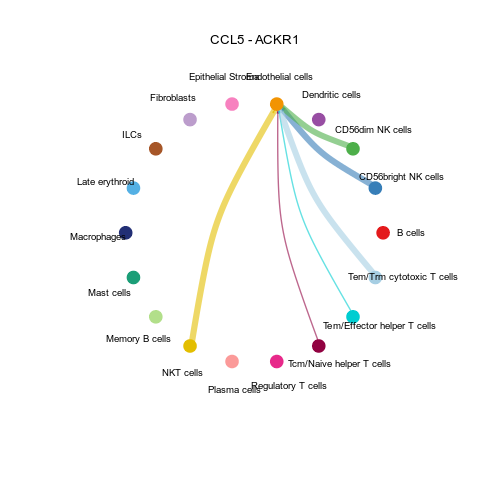

In [195]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[4,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
#svglite(file ="CCL5_CCR1.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#dev.off()

#ggsave('CCL5_CCR1.pdf')

In [167]:
%%R
svglite(file ="CCL5_CCR1_chord.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
dev.off()

#ggsave('CCL5_CCR1_chord.pdf')

png 
  2 


In [99]:
%%R
netVisual_bubble(cellchat, sources.use = c(2,3), signaling = c("CCL"), remove.isolate = FALSE)
ggsave('ccl_nk_cells_bubble.pdf')

Saving 6.67 x 6.67 in image


In [168]:
%%R
plotGeneExpression(cellchat, signaling = "CCL")
ggsave('CCL_gene_expression.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [169]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="CCL_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
dev.off()

#ggsave('CCL_sig_pathway_role_network.pdf')

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~01s           |+++                                               | 5 % ~03s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~02s           |++++++                                            | 11% ~03s           |+++++++                                           | 14% ~02s           |++++++++                                          | 16% ~02s           |++++++++++                                        | 18% ~02s           |+++++++++++                                       | 20% ~02s           |++++++++++++                                      | 23% ~02s           |+++++++++++++                                     | 25% ~02s           |++++++++++++++                                    | 27% ~01s           |+++++++++++++++                                   | 30% ~01s 

### MHC-I

In [135]:
%%R
library(svglite)

png 
  2 


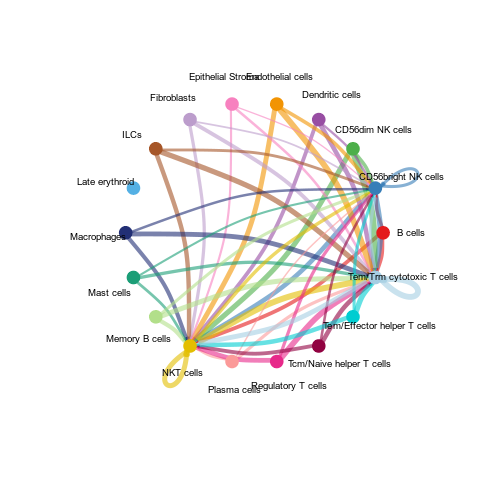

In [197]:
%%R
pathways.show <- c("MHC-I") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
#svglite(file ="a.pdf")
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
svglite(file ="MHC_I_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#ggsave('MHC_I_pathway_netvisual_aggregate_circle.pdf')
dev.off()

In [172]:
%%R
# Chord diagram
par(mfrow=c(1,1))
svglite(file ="MHC_I_pathway_netvisual_aggregate_chord.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
dev.off()
#ggsave('MHC_I_pathway_netvisual_aggregate_chord.pdf')

png 
  2 


In [173]:
%%R
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
#> Do heatmap based on a single object
ggsave('MHC_I_pathway_netvisual_heatmap.pdf')

Saving 6.67 x 6.67 in image


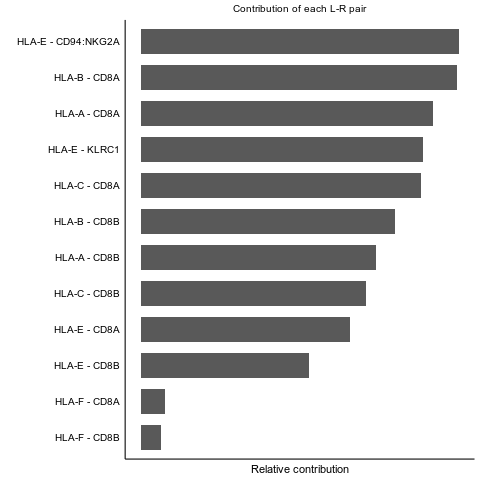

In [214]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)#, return.data=TRUE)
ggsave('MHC_I_pathway_contribution.pdf')

In [213]:
%%R
mhc_cont$LR.contribution$name

 [1] HLA-E - CD94:NKG2A HLA-B - CD8A       HLA-A - CD8A       HLA-E - KLRC1     
 [5] HLA-C - CD8A       HLA-B - CD8B       HLA-A - CD8B       HLA-C - CD8B      
 [9] HLA-E - CD8A       HLA-E - CD8B       HLA-F - CD8A       HLA-F - CD8B      
12 Levels: HLA-E - CD94:NKG2A HLA-B - CD8A HLA-A - CD8A ... HLA-F - CD8B


png 
  2 


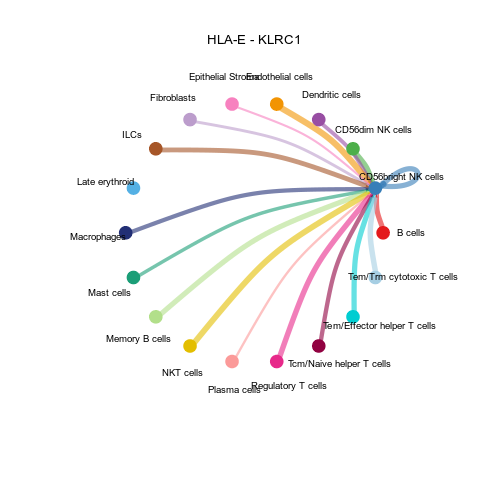

In [175]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[11,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
svglite(file ="HLA_E_KLRC1.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
dev.off()
#ggsave('HLA_E_KLRC1.pdf')

png 
  2 


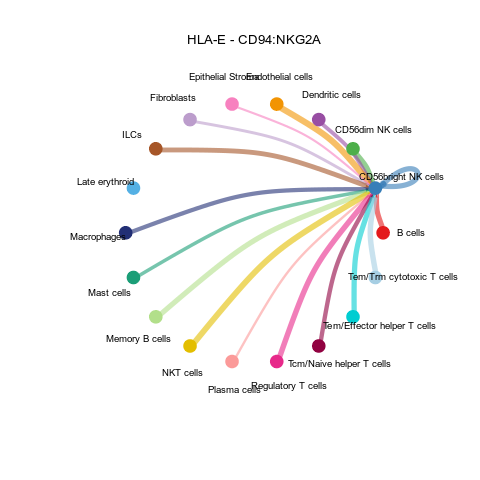

In [176]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[12,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
svglite(file ="HLA_E_CD94.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
dev.off()
#ggsave('HLA_E_CD94.pdf')

In [177]:
%%R
svglite(file ="HLA_E_CD94_chord.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
dev.off()
#ggsave('HLA_E_CD94.pdf')

png 
  2 


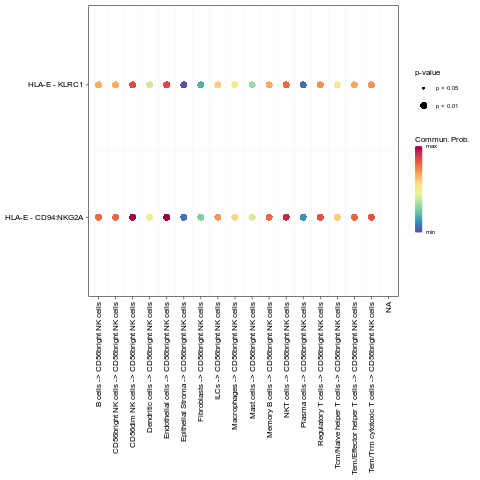

In [215]:
%%R
netVisual_bubble(cellchat, targets.use = c(2,3), signaling = c("MHC-I"), remove.isolate = FALSE)
ggsave('MHC_I_nk_cells_bubble.pdf')

In [179]:
%%R
plotGeneExpression(cellchat, signaling = "MHC-I")
ggsave('MHC_I_gene_expression.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [180]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="MHC_I_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
dev.off()
#ggsave('MHC_I_sig_pathway_role_network.pdf')

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~02s           |+++                                               | 5 % ~04s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~03s           |++++++                                            | 11% ~03s           |+++++++                                           | 14% ~03s           |++++++++                                          | 16% ~03s           |++++++++++                                        | 18% ~02s           |+++++++++++                                       | 20% ~02s           |++++++++++++                                      | 23% ~02s           |+++++++++++++                                     | 25% ~02s           |++++++++++++++                                    | 27% ~02s           |+++++++++++++++                                   | 30% ~02s 

### XCR

In [129]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 12675 genes.
 738416 cells. 
CellChat analysis of single cell RNA-seq data! 


In [189]:
%%R
pathways.show.all <- cellchat@netP$pathways

In [190]:
%%R
pathways.show.all

 [1] "MHC-I"      "MIF"        "CLEC"       "COLLAGEN"   "CD99"      
 [6] "APP"        "FN1"        "CD45"       "MHC-II"     "GALECTIN"  
[11] "ANNEXIN"    "MK"         "SPP1"       "LAMININ"    "CCL"       
[16] "ITGB2"      "CXCL"       "CD22"       "ADGRE5"     "VISFATIN"  
[21] "PECAM1"     "THBS"       "LCK"        "PARs"       "RESISTIN"  
[26] "THY1"       "ICAM"       "BAFF"       "SELL"       "UGRP1"     
[31] "CD23"       "COMPLEMENT" "JAM"        "ESAM"       "VEGF"      
[36] "CD86"       "IFN-II"     "CDH5"       "SELPLG"     "GAS"       
[41] "OSM"        "TWEAK"      "MPZ"        "FGF"       


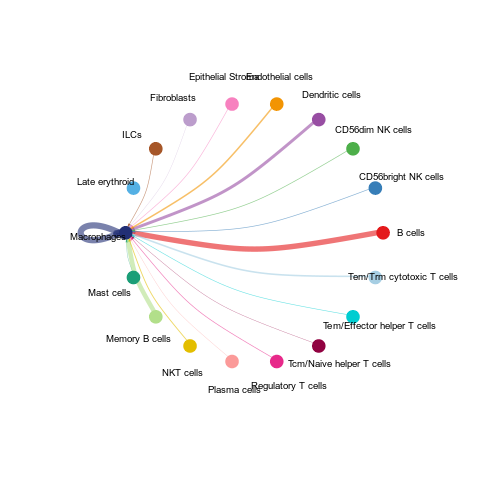

In [250]:
%%R
pathways.show <- c("MHC-II") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
#svglite(file ="a.pdf")
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="MHC_I_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#ggsave('MHC_I_pathway_netvisual_aggregate_circle.pdf')
#dev.off()

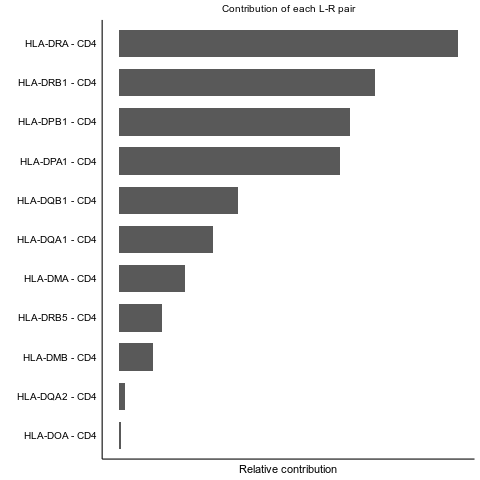

In [251]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)#, return.data=TRUE)
#ggsave('MHC_I_pathway_contribution.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


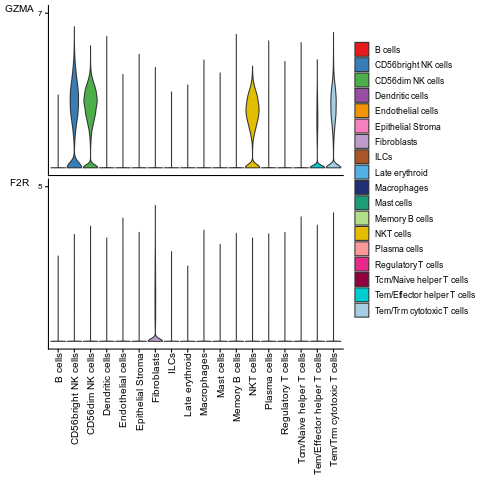

In [241]:
%%R
plotGeneExpression(cellchat, signaling = pathways.show)
#ggsave('MHC_I_gene_expression.pdf')

In [252]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 12675 genes.
 738416 cells. 
CellChat analysis of single cell RNA-seq data! 
